# Using Stacked LSTM Architecture for Time Series Prediction

### Importing Libraries

In [15]:

%matplotlib inline
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras import optimizers




### Importing our Dataset and applying random seed for initializing random generator

In [2]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

            the tuberculosis morbitity
date                                  
2004-01-01                       16.07
2004-02-01                       14.24
2004-03-01                       18.03
2004-04-01                       15.55
2004-05-01                       13.64


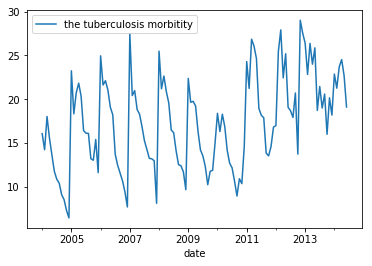

In [3]:
numpy.random.seed(10)
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y%m')
dataframe = pd.read_csv('s1-table.csv', parse_dates=['date'] , index_col=['date'],date_parser=dateparse)
print(dataframe.head())
dataframe.plot()



In [37]:
dataset = dataframe.values
dataset = dataset.astype('float32')


### Importing MinMaxScaler for creating uniformity within the dataset

In [38]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

### Splitting the dataset into train and test for both X and Y

In [39]:

train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))


In [40]:
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(1):
	model.fit(trainX, trainY, nb_epoch=500, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

C:\Users\Jess\Anaconda3\lib\site-packages\keras\layers\recurrent.py:2024: UserWarning: RNN dropout is no longer supported with the Theano backend due to technical limitations. You can either set `dropout` and `recurrent_dropout` to 0, or use the TensorFlow backend.
  'RNN dropout is no longer supported with the Theano backend '
C:\Users\Jess\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/500
 - 0s - loss: 0.0749
Epoch 2/500
 - 0s - loss: 0.0584
Epoch 3/500
 - 0s - loss: 0.0565
Epoch 4/500
 - 0s - loss: 0.0550
Epoch 5/500
 - 0s - loss: 0.0538
Epoch 6/500
 - 0s - loss: 0.0528
Epoch 7/500
 - 0s - loss: 0.0519
Epoch 8/500
 - 0s - loss: 0.0510
Epoch 9/500
 - 0s - loss: 0.0501
Epoch 10/500
 - 0s - loss: 0.0490
Epoch 11/500
 - 0s - loss: 0.0478
Epoch 12/500
 - 0s - loss: 0.0463
Epoch 13/500
 - 0s - loss: 0.0443
Epoch 14/500
 - 0s - loss: 0.0420
Epoch 15/500
 - 0s - loss: 0.0395
Epoch 16/500
 - 0s - loss: 0.0369
Epoch 17/500
 - 0s - loss: 0.0346
Epoch 18/500
 - 0s - loss: 0.0328
Epoch 19/500
 - 0s - loss: 0.0316
Epoch 20/500
 - 0s - loss: 0.0311
Epoch 21/500
 - 0s - loss: 0.0309
Epoch 22/500
 - 0s - loss: 0.0310
Epoch 23/500
 - 0s - loss: 0.0313
Epoch 24/500
 - 0s - loss: 0.0314
Epoch 25/500
 - 0s - loss: 0.0314
Epoch 26/500
 - 0s - loss: 0.0311
Epoch 27/500
 - 0s - loss: 0.0307
Epoch 28/500
 - 0s - loss: 0.0303
Epoch 29/500
 - 0s - loss: 0.0299
Epoch 30/500
 - 0s - lo

 - 0s - loss: 0.0279
Epoch 239/500
 - 0s - loss: 0.0279
Epoch 240/500
 - 0s - loss: 0.0279
Epoch 241/500
 - 0s - loss: 0.0279
Epoch 242/500
 - 0s - loss: 0.0279
Epoch 243/500
 - 0s - loss: 0.0279
Epoch 244/500
 - 0s - loss: 0.0279
Epoch 245/500
 - 0s - loss: 0.0279
Epoch 246/500
 - 0s - loss: 0.0279
Epoch 247/500
 - 0s - loss: 0.0279
Epoch 248/500
 - 0s - loss: 0.0278
Epoch 249/500
 - 0s - loss: 0.0278
Epoch 250/500
 - 0s - loss: 0.0278
Epoch 251/500
 - 0s - loss: 0.0278
Epoch 252/500
 - 0s - loss: 0.0278
Epoch 253/500
 - 0s - loss: 0.0278
Epoch 254/500
 - 0s - loss: 0.0278
Epoch 255/500
 - 0s - loss: 0.0278
Epoch 256/500
 - 0s - loss: 0.0278
Epoch 257/500
 - 0s - loss: 0.0278
Epoch 258/500
 - 0s - loss: 0.0278
Epoch 259/500
 - 0s - loss: 0.0278
Epoch 260/500
 - 0s - loss: 0.0278
Epoch 261/500
 - 0s - loss: 0.0278
Epoch 262/500
 - 0s - loss: 0.0278
Epoch 263/500
 - 0s - loss: 0.0278
Epoch 264/500
 - 0s - loss: 0.0278
Epoch 265/500
 - 0s - loss: 0.0278
Epoch 266/500
 - 0s - loss: 0.0278

Epoch 473/500
 - 0s - loss: 0.0221
Epoch 474/500
 - 0s - loss: 0.0221
Epoch 475/500
 - 0s - loss: 0.0221
Epoch 476/500
 - 0s - loss: 0.0220
Epoch 477/500
 - 0s - loss: 0.0220
Epoch 478/500
 - 0s - loss: 0.0220
Epoch 479/500
 - 0s - loss: 0.0220
Epoch 480/500
 - 0s - loss: 0.0219
Epoch 481/500
 - 0s - loss: 0.0219
Epoch 482/500
 - 0s - loss: 0.0219
Epoch 483/500
 - 0s - loss: 0.0218
Epoch 484/500
 - 0s - loss: 0.0218
Epoch 485/500
 - 0s - loss: 0.0218
Epoch 486/500
 - 0s - loss: 0.0217
Epoch 487/500
 - 0s - loss: 0.0217
Epoch 488/500
 - 0s - loss: 0.0217
Epoch 489/500
 - 0s - loss: 0.0216
Epoch 490/500
 - 0s - loss: 0.0216
Epoch 491/500
 - 0s - loss: 0.0216
Epoch 492/500
 - 0s - loss: 0.0216
Epoch 493/500
 - 0s - loss: 0.0216
Epoch 494/500
 - 0s - loss: 0.0216
Epoch 495/500
 - 0s - loss: 0.0216
Epoch 496/500
 - 0s - loss: 0.0216
Epoch 497/500
 - 0s - loss: 0.0216
Epoch 498/500
 - 0s - loss: 0.0216
Epoch 499/500
 - 0s - loss: 0.0216
Epoch 500/500
 - 0s - loss: 0.0216


ValueError: Error when checking : expected lstm_28_input to have 3 dimensions, but got array with shape (34, 3)

### Calculating our Root Mean Square Value (RMSE) for both Training Test of the Dataset

In [36]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

TypeError: Singleton array 0.40310425 cannot be considered a valid collection.

### Plotting our Train and Test plots. 
#### The blue line is the original dataset plot. Orange Line is the Predicted training plot and Green is the Predicted test plot

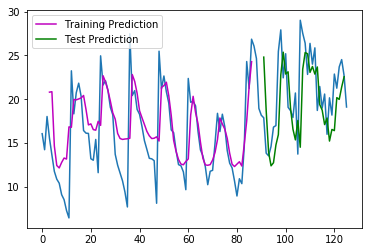

In [33]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot, color = 'm', label = 'Training Prediction')
plt.plot(testPredictPlot, color = 'green',label = 'Test Prediction')
plt.legend()
plt.show()


